# NETFLIX RECOMMENDATION PROJECT

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Load dataset file
df = pd.read_csv(r'C:\Users\Dell\Downloads\combined_data_1.txt.zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [8]:
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [9]:
df.shape

(24058263, 2)

In [10]:
df.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [210]:
# To count the null values resulting in movie count
movie_count=df.isnull().sum()
movie_count=movie_count['Rating']
movie_count

4499

In [211]:
#To calculate unique values of customer_Id
cust_count= df['Cust_Id'].nunique()
cust_count

475257

In [212]:
# To get actual no of customers
customer_count=cust_count-movie_count
customer_count

470758

In [213]:
# To get total no of ratings
rating_count= df['Rating'].count()
rating_count

24053764

In [214]:
# To find how many people have rated the movies 1,2,3,4,5 stars
stars= df.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


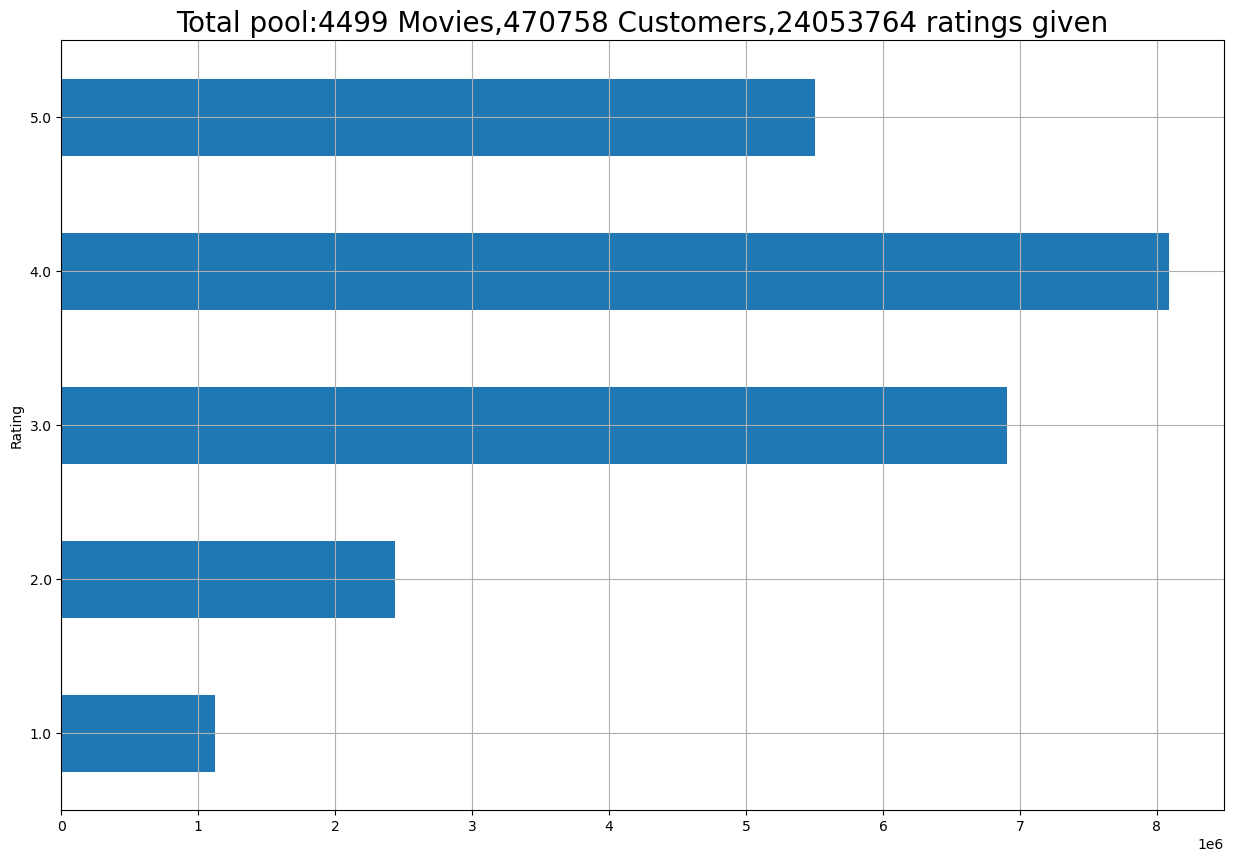

In [215]:
ax= stars.plot(kind='barh',legend=False,figsize=(15,10))
plt.title(f"Total pool:{movie_count} Movies,{customer_count} Customers,{rating_count} ratings given",fontsize=20)
plt.grid(True)
plt.show()

In [216]:
df_nan= pd.DataFrame(pd.isnull(df.Rating))
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [217]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [218]:
df_nan.shape

(4499, 1)

In [219]:
df_nan=df_nan.reset_index()
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [220]:
movie_np=[]
movie_id=1
for i,j in zip(df_nan['index'][1:],df_nan['index'][0:]):
    temp= np.full((1,i-j-1),movie_id)
    movie_np =np.append(movie_np,temp)
    movie_id +=1
temp = np.full((1,24058262-24057834),movie_id)
movie_np = np.append(movie_np,temp)

In [221]:
movie_np

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.499e+03, 4.499e+03,
       4.499e+03])

In [222]:
df=df[pd.notnull(df['Rating'])]
df['Movie_Id']=movie_np.astype(int)
df['Cust_Id']=df['Cust_Id'].astype(int)
print('Now the dataset will look like')
df

C:\Users\Dell\AppData\Local\Temp\ipykernel_4472\2175661538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Movie_Id']=movie_np.astype(int)


Now the dataset will look like


C:\Users\Dell\AppData\Local\Temp\ipykernel_4472\2175661538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cust_Id']=df['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [223]:
f=['count','mean']

In [224]:
dataset_movie_summary=df.groupby('Movie_Id').agg(f)
dataset_movie_summary

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [225]:
# finding out the no of movies which is seen by less than 70% of users 
dataset_movie_summary=df.groupby('Movie_Id')['Rating'].agg(f)
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [226]:
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7))
movie_benchmark

1799

In [227]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [228]:
dataset_cust_summary=df.groupby('Cust_Id').agg(f)
dataset_cust_summary

Rating           Movie_Id             
         count      mean    count         mean
Cust_Id                                       
6          153  3.333333      153  2352.960784
7          195  4.066667      195  2422.841026
8           21  4.000000       21  2583.047619
10          49  3.346939       49  2251.897959
25           4  3.500000        4  2199.500000
...        ...       ...      ...          ...
2649404     12  4.083333       12  1825.083333
2649409     10  4.000000       10  1313.200000
2649421      3  5.000000        3  2369.000000
2649426     74  4.067568       74  2243.702703
2649429     62  4.161290       62  2273.387097

[470758 rows x 4 columns]

In [229]:
#finding out the no of users who are inactive
dataset_cust_summary=df.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [230]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7))
cust_benchmark

52

In [231]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [232]:
#now removing all the users who are inactive and movies that are less watched by users
print('The original dataframe has:',df.shape,'shape')


The original dataframe has: (24053764, 3) shape


In [233]:
df=df[~df['Movie_Id'].isin(drop_movie_list)]

In [234]:
df=df[~df['Cust_Id'].isin(drop_cust_list)]

In [235]:
print('After trimming,the shape is:{}'.format(df.shape))

After trimming,the shape is:(17337458, 3)


In [236]:
df

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056841,520675,3.0,4496
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056845,1559566,3.0,4496


In [237]:
df_title =pd.read_csv(r'C:\Users\Dell\Downloads\movie_titles.csv',encoding='ISO-8859-1',
                      header=None,usecols=[0,1,2],names=['Movie_Id','Year','Name'])
df_title.set_index('Movie_Id',inplace=True)

In [238]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [242]:
!pip install scikit-surprise

In [243]:
import math 
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [244]:
reader=Reader()

In [246]:
data=Dataset.load_from_df(df[['Cust_Id','Movie_Id','Rating']][:100000],reader)


In [247]:
svd=SVD()

In [248]:
cross_validate(svd,data,measures=['RMSE','MAE'],verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9989  0.9946  1.0029  0.9968  0.9954  0.9977  0.0030  
MAE (testset)     0.8011  0.7980  0.8014  0.7978  0.8010  0.7999  0.0016  
Fit time          0.95    0.96    1.03    1.00    1.02    0.99    0.03    
Test time         0.09    0.09    0.09    0.09    0.09    0.09    0.00    


{'test_rmse': array([0.99885177, 0.9946168 , 1.00289128, 0.99684389, 0.99541227]),
 'test_mae': array([0.80109444, 0.79798675, 0.80139297, 0.79782178, 0.8010269 ]),
 'fit_time': (0.9457366466522217,
  0.9555149078369141,
  1.0282485485076904,
  1.0033507347106934,
  1.0203404426574707),
 'test_time': (0.09380102157592773,
  0.08869028091430664,
  0.09069347381591797,
  0.09272360801696777,
  0.08674454689025879)}

In [249]:
df.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


We first take the user with cust_id 712664 and try to recommend some movies based on his ratings.

In [265]:
dataset_712664 =df[(df['Cust_Id']==712664)& (df['Rating']==5)]
dataset_712664

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
...,...,...,...
20461546,712664,5.0,3887
21752209,712664,5.0,4109
22487781,712664,5.0,4266
23397883,712664,5.0,4384


In [287]:
drop=dataset_712664['Movie_Id']
print(drop)

696            3
308787        79
577555       175
898451       199
1019562      241
            ... 
20461546    3887
21752209    4109
22487781    4266
23397883    4384
23472573    4392
Name: Movie_Id, Length: 84, dtype: int32


In [254]:
user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [278]:
user_712664=df_title.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [279]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [289]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop)]
user_712664

,Movie_Id,Year,Name
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
25,26,2004.0,Never Die Alone
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [290]:
user_712664['Estimate_score']=user_712664['Movie_Id'].apply(lambda x:svd.predict(712664,x).est)
user_712664

C:\Users\Dell\AppData\Local\Temp\ipykernel_4472\2897996089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_score']=user_712664['Movie_Id'].apply(lambda x:svd.predict(712664,x).est)


,Movie_Id,Year,Name,Estimate_score
7,8,2004.0,What the #$*! Do We Know!?,3.622504
15,16,1996.0,Screamers,3.807569
16,17,2005.0,7 Seconds,3.115320
17,18,1994.0,Immortal Beloved,3.782706
25,26,2004.0,Never Die Alone,2.811539
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.752678
17766,17767,2004.0,Fidel Castro: American Experience,3.752678
17767,17768,2000.0,Epoch,3.752678
17768,17769,2003.0,The Company,3.752678


In [291]:
user_712664=user_712664.drop('Movie_Id',axis=1)

In [292]:
user_712664=user_712664.sort_values('Estimate_score')
print(user_712664)

         Year                        Name  Estimate_score
25     2004.0             Never Die Alone        2.811539
16     2005.0                   7 Seconds        3.115320
7      2004.0  What the #$*! Do We Know!?        3.622504
27     2002.0             Lilo and Stitch        3.696407
29     2003.0      Something's Gotta Give        3.728081
...       ...                         ...             ...
8088   1990.0          My Mother's Castle        3.752678
8076   1986.0              Something Wild        3.752678
17769  2003.0                Alien Hunter        3.752678
17     1994.0            Immortal Beloved        3.782706
15     1996.0                   Screamers        3.807569

[14537 rows x 3 columns]


In [293]:
user_712664=user_712664.sort_values('Estimate_score',ascending=False)
print(user_712664.head(10))

      Year                            Name  Estimate_score
15  1996.0                       Screamers        3.807569
17  1994.0                Immortal Beloved        3.782706
75  1952.0           I Love Lucy: Season 2        3.752678
32  2000.0  Aqua Teen Hunger Force: Vol. 1        3.752678
43  1996.0                  Spitfire Grill        3.752678
44  1999.0                 The Love Letter        3.752678
45  1964.0  Rudolph the Red-Nosed Reindeer        3.752678
46  1952.0       The Bad and the Beautiful        3.752678
47  2001.0                  Justice League        3.752678
51  2002.0         The Weather Underground        3.752678


In [295]:
df.sort_values('Rating',ascending=False)

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
7979046,2298769,5.0,1595
7979063,2128818,5.0,1595
7979062,666743,5.0,1595
7979061,307396,5.0,1595
...,...,...,...
17805362,75673,1.0,3416
12101672,1515015,1.0,2346
17805356,847774,1.0,3416
17805354,1292631,1.0,3416


We first take the user with cust_id 2298769 and try to recommend some movies based on his ratings.

In [296]:
dataset_2298769=df[(df['Cust_Id']==2298769)& (df['Rating']==5)]
dataset_2298769

,Cust_Id,Rating,Movie_Id
644670,2298769,5.0,175
924769,2298769,5.0,199
1051520,2298769,5.0,241
1118096,2298769,5.0,256
2456492,2298769,5.0,457
3128760,2298769,5.0,571
3406658,2298769,5.0,646
4458941,2298769,5.0,872
4588818,2298769,5.0,889
4827873,2298769,5.0,963


In [299]:
drop=dataset_2298769['Movie_Id']
drop=list(drop)
print(drop)

[175, 199, 241, 256, 457, 571, 646, 872, 889, 963, 1324, 1595, 1700, 1770, 1865, 2430, 2452, 2862, 3290, 3355, 3506, 3824, 3886, 3900, 4284, 4353]


In [300]:
user_2298769=df_title.copy()
user_2298769

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [301]:
user_2298769=df_title.reset_index()
user_2298769

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [302]:
user_2298769=user_2298769[~user_2298769['Movie_Id'].isin(drop_movie_list)]
user_2298769

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [303]:
user_2298769=user_2298769[~user_2298769['Movie_Id'].isin(drop)]
user_2298769

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [304]:
user_2298769['Estimate_score']=user_2298769['Movie_Id'].apply(lambda x:svd.predict(2298769,x).est)
user_2298769

C:\Users\Dell\AppData\Local\Temp\ipykernel_4472\4231508825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_2298769['Estimate_score']=user_2298769['Movie_Id'].apply(lambda x:svd.predict(2298769,x).est)


,Movie_Id,Year,Name,Estimate_score
2,3,1997.0,Character,3.192347
7,8,2004.0,What the #$*! Do We Know!?,2.979814
15,16,1996.0,Screamers,1.995654
16,17,2005.0,7 Seconds,2.071532
17,18,1994.0,Immortal Beloved,3.786230
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.434937
17766,17767,2004.0,Fidel Castro: American Experience,3.434937
17767,17768,2000.0,Epoch,3.434937
17768,17769,2003.0,The Company,3.434937


In [305]:
user_2298769=user_2298769.drop('Movie_Id',axis=1)

In [306]:
user_2298769=user_2298769.sort_values('Estimate_score')
print(user_2298769)

         Year                               Name  Estimate_score
15     1996.0                          Screamers        1.995654
16     2005.0                          7 Seconds        2.071532
25     2004.0                    Never Die Alone        2.220819
7      2004.0         What the #$*! Do We Know!?        2.979814
2      1997.0                          Character        3.192347
...       ...                                ...             ...
8051   2000.0   Emmanuelle's Intimate Encounters        3.434937
8039   1971.0  The Old Grey Whistle Test: Vol. 1        3.434937
17769  2003.0                       Alien Hunter        3.434937
17     1994.0                   Immortal Beloved        3.786230
27     2002.0                    Lilo and Stitch        3.796660

[14595 rows x 3 columns]


In [307]:
user_2298769=user_2298769.sort_values('Estimate_score',ascending=False)
print(user_2298769.head(10))

      Year                            Name  Estimate_score
27  2002.0                 Lilo and Stitch        3.796660
17  1994.0                Immortal Beloved        3.786230
75  1952.0           I Love Lucy: Season 2        3.434937
32  2000.0  Aqua Teen Hunger Force: Vol. 1        3.434937
43  1996.0                  Spitfire Grill        3.434937
44  1999.0                 The Love Letter        3.434937
45  1964.0  Rudolph the Red-Nosed Reindeer        3.434937
46  1952.0       The Bad and the Beautiful        3.434937
47  2001.0                  Justice League        3.434937
51  2002.0         The Weather Underground        3.434937
